In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hkracing/runs.csv
/kaggle/input/hkracing/races.csv


# SELECT FEATURES & DATA CLEANING

In [2]:
import pandas as pd

In [3]:
runs = pd.read_csv("../input/hkracing/runs.csv")
runs.head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,...,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154


In [4]:
races = pd.read_csv('../input/hkracing/races.csv')
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


## Select features for modeling

In [5]:
runs_data = runs[['race_id', 'won', 'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw', 'win_odds',
       'place_odds', 'horse_id']]
runs_data.head()

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,horse_id
0,0,0.0,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,3917
1,0,0.0,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,2157
2,0,0.0,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,858
3,0,0.0,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,1853
4,0,0.0,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,2796


In [6]:
races_data = races[['race_id', 'venue', 'config', 'surface', 'distance', 'going', 'race_class', 'date']]
races_data.head()

,race_id,venue,config,surface,distance,going,race_class,date
0,0,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
1,1,ST,A,0,1200,GOOD TO FIRM,5,1997-06-02
2,2,ST,A,0,1400,GOOD TO FIRM,4,1997-06-02
3,3,ST,A,0,1200,GOOD TO FIRM,1,1997-06-02
4,4,ST,A,0,1600,GOOD TO FIRM,4,1997-06-02


In [7]:
# merge the two datasets based on race_id column
df = pd.merge(runs_data, races_data)
df.head()

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,horse_id,venue,config,surface,distance,going,race_class,date
0,0,0.0,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,3917,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
1,0,0.0,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,2157,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
2,0,0.0,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,858,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
3,0,0.0,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,1853,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02
4,0,0.0,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,2796,ST,A,0,1400,GOOD TO FIRM,5,1997-06-02


## Check missing values

In [8]:
df.isnull().any()

race_id            False
won                False
horse_age          False
horse_country       True
horse_type          True
horse_rating       False
horse_gear         False
declared_weight    False
actual_weight      False
draw               False
win_odds           False
place_odds          True
horse_id           False
venue              False
config             False
surface            False
distance           False
going              False
race_class         False
date               False
dtype: bool

In [9]:
df.horse_country.isnull().value_counts(ascending=True)

True         2
False    79445
Name: horse_country, dtype: int64

In [10]:
df.horse_type.isnull().value_counts(ascending=True)

True         2
False    79445
Name: horse_type, dtype: int64

In [11]:
df.place_odds.isnull().value_counts(ascending=True)

True      3735
False    75712
Name: place_odds, dtype: int64

The amount of rows for missing values is relatively small, therefore we decided to drop these rows. 

In [12]:
df.shape

(79447, 20)

In [13]:
df = df.dropna()
df.shape

(75710, 20)

## Basic information of the data

In [14]:
df.date = pd.to_datetime(df.date)
df.date.dtype

dtype('<M8[ns]')

In [15]:
min(df.date), max(df.date)
# 8-year duration

(Timestamp('1997-06-02 00:00:00'), Timestamp('2005-06-05 00:00:00'))

In [16]:
start_time = min(df.date).strftime('%d %B %Y')
end_time = max(df.date).strftime('%d %B %Y')
no_of_horses = df.horse_id.nunique()
no_of_races = df.race_id.nunique()

print(f'The dataset was collected from {start_time} to {end_time}, which contains information about {no_of_horses} horses and {no_of_races} races. ')

The dataset was collected from 02 June 1997 to 05 June 2005, which contains information about 4280 horses and 6047 races. 


In [17]:
# drop the unnecessary columns
df = df.drop(columns=['horse_id', 'date'])
df.head()

,race_id,won,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,venue,config,surface,distance,going,race_class
0,0,0.0,3,AUS,Gelding,60,--,1020.0,133,7,9.7,3.7,ST,A,0,1400,GOOD TO FIRM,5
1,0,0.0,3,NZ,Gelding,60,--,980.0,133,12,16.0,4.9,ST,A,0,1400,GOOD TO FIRM,5
2,0,0.0,3,NZ,Gelding,60,--,1082.0,132,8,3.5,1.5,ST,A,0,1400,GOOD TO FIRM,5
3,0,0.0,3,SAF,Gelding,60,--,1118.0,127,13,39.0,11.0,ST,A,0,1400,GOOD TO FIRM,5
4,0,0.0,3,GB,Gelding,60,--,972.0,131,14,50.0,14.0,ST,A,0,1400,GOOD TO FIRM,5


In [18]:
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'venue', 'config', 'surface',
       'distance', 'going', 'race_class'],
      dtype='object')

## Impute feature

In [19]:
df.horse_gear.value_counts(ascending=False)

--             56518
B               3098
TT              2590
TT/B            2350
H               1192
               ...  
TT/H-/P-/B2        1
TT1/V-/SR2         1
H-/PC-             1
CO-/H-/SR-         1
CP-/H-/B2          1
Name: horse_gear, Length: 760, dtype: int64

In [20]:
df.horse_gear.nunique()

760

For horse_gear column, we dicided to impute the data into 1 and 0 (with gear and no gear), rather than one-hot labeling (which will lead to numerous features). 

In [21]:
def horse_gear_impute(cols):
    if cols == '--':
        return 0
    else: 
        return 1

In [22]:
df.horse_gear = df.horse_gear.apply(horse_gear_impute)

In [23]:
df.horse_gear.value_counts()

0    56518
1    19192
Name: horse_gear, dtype: int64

## One-hot encoding for categorical features

In [24]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,0,0.0,3,60,0,1020.0,133,7,9.7,3.7,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,3,60,0,980.0,133,12,16.0,4.9,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,3,60,0,1082.0,132,8,3.5,1.5,...,0,0,1,0,0,0,0,0,0,0
3,0,0.0,3,60,0,1118.0,127,13,39.0,11.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0.0,3,60,0,972.0,131,14,50.0,14.0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_rating', 'horse_gear',
       'declared_weight', 'actual_weight', 'draw', 'win_odds', 'place_odds',
       'surface', 'distance', 'race_class', 'horse_country_AUS',
       'horse_country_BRZ', 'horse_country_CAN', 'horse_country_FR',
       'horse_country_GB', 'horse_country_GER', 'horse_country_GR',
       'horse_country_IRE', 'horse_country_ITY', 'horse_country_JPN',
       'horse_country_NZ', 'horse_country_SAF', 'horse_country_USA',
       'horse_country_ZIM', 'horse_type_Colt', 'horse_type_Filly',
       'horse_type_Gelding', 'horse_type_Grey', 'horse_type_Horse',
       'horse_type_Mare', 'horse_type_Rig', 'horse_type_Roan', 'venue_ST',
       'config_A+3', 'config_B', 'config_B+2', 'config_C', 'config_C+3',
       'going_GOOD', 'going_GOOD TO FIRM', 'going_GOOD TO YIELDING',
       'going_SLOW', 'going_SOFT', 'going_WET FAST', 'going_WET SLOW',
       'going_YIELDING', 'going_YIELDING TO SOFT'],
      dtype='object')

## Features explanation:
won - whether horse won (1) or otherwise (0)<br/>
horse_age - current age of this horse at the time of the race<br/>
horse_rating - rating number assigned by HKJC to this horse at the time of the race<br/>
horse_gear - string representing the gear carried by the horse in the race. An explanation of the codes used may be found on the HKJC website.<br/>
declared_weight - declared weight of the horse and jockey, in lbs<br/>
actual_weight - actual weight carried by the horse, in lbs<br/>
draw - post position number of the horse in this race<br/>
win_odds - win odds for this horse at start of race<br/>
place_odds - place (finishing in 1st, 2nd or 3rd position) odds for this horse at start of race<br/>
surface - a number representing the type of race track surface: 1 = dirt, 0 = turf<br/>
distance - distance of the race, in metres<br/>
race_class - a number representing the class of the race<br/>
horse_country - country of origin of this horse<br/>
horse_type - sex of the horse, e.g. 'Gelding', 'Mare', 'Horse', 'Rig', 'Colt', 'Filly'<br/>
venue - a 2-character string, representing which of the 2 race courses this race took place at: ST = Shatin, HV = Happy Valley<br/>
config - race track configuration, mostly related to the position of the inside rail. For more details, see the HKJC website.<br/>
going - track condition. For more details, see the HKJC website.<br/>

# MODELING

In [26]:
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.metrics import precision_score, classification_report, confusion_matrix

Using TensorFlow backend.


## Extract the last race data for model testing

In [27]:
last_raceid = max(df.race_id)
last_raceid

6128

In [28]:
# split the last race data for deployment & save it in last_race variable
last_race = df[df.race_id == last_raceid]
last_race

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
76697,6128,0.0,6,80,1,1078.0,133,11,99.0,19.0,...,1,0,1,0,0,0,0,0,0,0
76698,6128,0.0,4,77,1,1110.0,130,8,13.0,2.9,...,1,0,1,0,0,0,0,0,0,0
76699,6128,0.0,4,74,0,980.0,127,5,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
76700,6128,1.0,3,73,1,1153.0,126,3,1.7,1.2,...,1,0,1,0,0,0,0,0,0,0
76701,6128,0.0,4,73,1,1117.0,124,2,71.0,11.0,...,1,0,1,0,0,0,0,0,0,0
76702,6128,0.0,3,70,1,1166.0,123,13,99.0,23.0,...,1,0,1,0,0,0,0,0,0,0
76703,6128,0.0,4,70,1,1116.0,123,12,17.0,3.0,...,1,0,1,0,0,0,0,0,0,0
76704,6128,0.0,4,68,1,1068.0,121,10,55.0,9.0,...,1,0,1,0,0,0,0,0,0,0
76705,6128,0.0,4,67,1,1091.0,118,1,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
76706,6128,0.0,4,65,0,1141.0,116,4,33.0,5.7,...,1,0,1,0,0,0,0,0,0,0


In [29]:
new_data = df[:75696]   # drop the last race data for modeling
new_data = new_data.drop(columns='race_id')   # drop the unnecessary race_id column
new_data.tail()

,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
76692,0.0,4,84,1,1115.0,121,4,99.0,26.0,0,...,1,0,1,0,0,0,0,0,0,0
76693,0.0,5,84,1,1167.0,121,12,85.0,13.0,0,...,1,0,1,0,0,0,0,0,0,0
76694,0.0,8,83,1,1097.0,113,2,14.0,3.9,0,...,1,0,1,0,0,0,0,0,0,0
76695,0.0,6,83,1,1092.0,118,8,99.0,24.0,0,...,1,0,1,0,0,0,0,0,0,0
76696,0.0,4,81,1,1098.0,111,13,3.1,1.5,0,...,1,0,1,0,0,0,0,0,0,0


In [30]:
new_data.shape

(75696, 49)

## Distribution of labels

Text(0.5, 1.0, 'Number of Labels by Class')

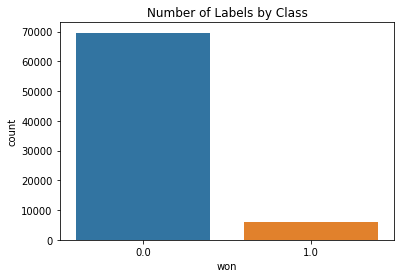

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=new_data, x='won')
plt.title('Number of Labels by Class')

In [32]:
X = new_data.drop(columns='won')
y = new_data['won']

In [33]:
# extermely skewed data
y.value_counts()

0.0    69638
1.0     6058
Name: won, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## kNN Classifier (original data)

In [35]:
k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # precision ratio: tp / (tp + fp), aiming at minimize fp (predict: win, actual: lose)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [36]:
# find the highest precision score of the positive class (1)
import operator
max(scores.items(), key=operator.itemgetter(1))

(8, 0.3170731707317073)

Text(0.5, 1.0, 'Original Data')

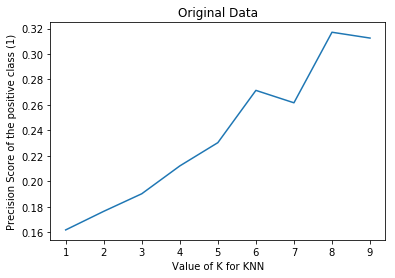

In [37]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')
plt.title('Original Data')

In [38]:
start = time()

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 6.52180 sec


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     13918
         1.0       0.32      0.01      0.02      1222

    accuracy                           0.92     15140
   macro avg       0.62      0.50      0.49     15140
weighted avg       0.87      0.92      0.88     15140



[[13890    28]
 [ 1209    13]]


Text(0, 0.5, 'True')

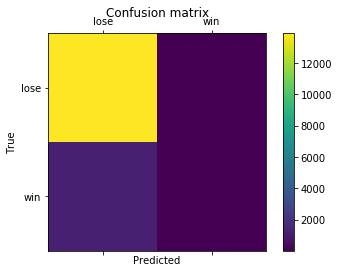

In [40]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

## kNN Classifier (under-sampling)

In [41]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_sample(X_train, y_train)

k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rus, y_rus)
    y_pred = knn.predict(X_test)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [42]:
max(scores.items(), key=operator.itemgetter(1))

(8, 0.15118616807398472)

Text(0.5, 1.0, 'RUS Data')

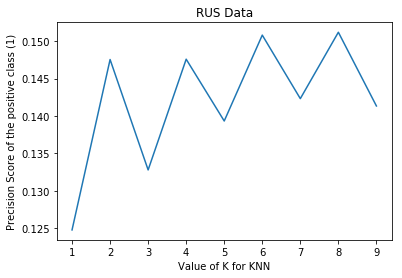

In [43]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')
plt.title('RUS Data')

In [44]:
start = time()

knn_rus = KNeighborsClassifier(n_neighbors=8)
knn_rus.fit(X_rus, y_rus)
y_pred = knn_rus.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 1.44231 sec


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81     13918
         1.0       0.15      0.62      0.24      1222

    accuracy                           0.69     15140
   macro avg       0.55      0.66      0.52     15140
weighted avg       0.89      0.69      0.76     15140



[[9696 4222]
 [ 470  752]]


Text(0, 0.5, 'True')

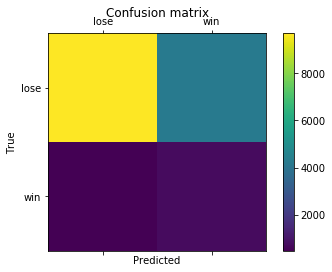

In [46]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

## kNN Classifier (over-sampling)

In [47]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_sample(X_train, y_train)

k_range = range(1,10)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_sm, y_sm)
    y_pred = knn.predict(X_test)
    scores[k] = precision_score(y_test, y_pred)
    scores_list.append(precision_score(y_test, y_pred))

In [48]:
max(scores.items(), key=operator.itemgetter(1))

(2, 0.15355805243445692)

Text(0.5, 1.0, 'SMOTE Data')

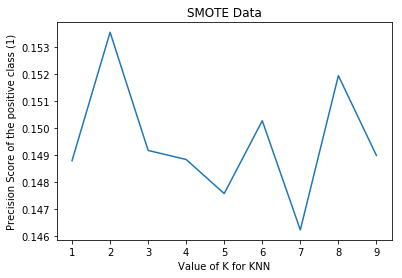

In [49]:
# SMOTE data
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Precision Score of the positive class (1)')
plt.title('SMOTE Data')

In [50]:
start = time()

knn_sm = KNeighborsClassifier(n_neighbors=2)
knn_sm.fit(X_sm, y_sm)
y_pred = knn_sm.predict(X_test)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 10.94690 sec


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     13918
         1.0       0.15      0.27      0.20      1222

    accuracy                           0.82     15140
   macro avg       0.54      0.57      0.55     15140
weighted avg       0.87      0.82      0.84     15140



[[12110  1808]
 [  894   328]]


Text(0, 0.5, 'True')

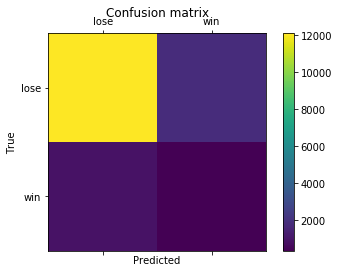

In [52]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel and GPU learning.
* Capable of handling large-scale data.

## LightGBM (original data)

In [53]:
start = time()

d_train = lgb.Dataset(X_train, label = y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 1.41687 sec


In [54]:
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.0995:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93     13918
         1.0       0.28      0.40      0.33      1222

    accuracy                           0.87     15140
   macro avg       0.61      0.66      0.63     15140
weighted avg       0.89      0.87      0.88     15140



[[12631  1287]
 [  729   493]]


Text(0, 0.5, 'True')

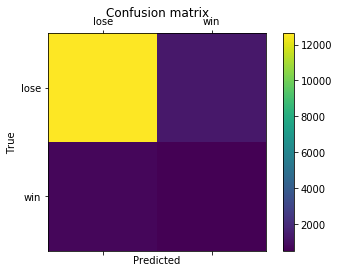

In [56]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

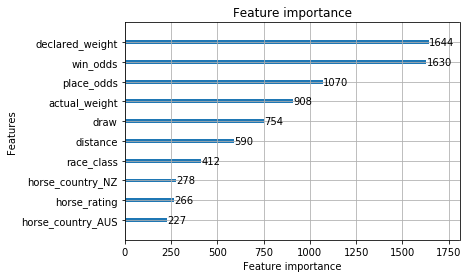

In [57]:
# plot model’s feature importances (original data)
lgb.plot_importance(clf, max_num_features=10)

## LightGBM (under-sampling)

In [58]:
# convert array data into dataframe with column names, and feed into lgb model
X_rus = pd.DataFrame(X_rus, columns=list(X_train))
X_rus.head()

,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,distance,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,3.0,60.0,0.0,989.0,108.0,10.0,75.0,14.0,0.0,1200.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,36.0,1.0,1077.0,127.0,4.0,5.9,1.6,0.0,1200.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,64.0,1.0,1099.0,115.0,4.0,78.0,11.0,1.0,1200.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,60.0,0.0,1126.0,114.0,5.0,48.0,8.2,0.0,1650.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,60.0,0.0,1098.0,119.0,8.0,60.0,10.0,0.0,1400.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
start = time()

d_train = lgb.Dataset(X_rus, label = y_rus)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf_rus = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 0.41827 sec


In [60]:
#Prediction
y_pred = clf_rus.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.55:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     13918
         1.0       0.30      0.35      0.32      1222

    accuracy                           0.88     15140
   macro avg       0.62      0.64      0.63     15140
weighted avg       0.89      0.88      0.88     15140



[[12898  1020]
 [  793   429]]


Text(0, 0.5, 'True')

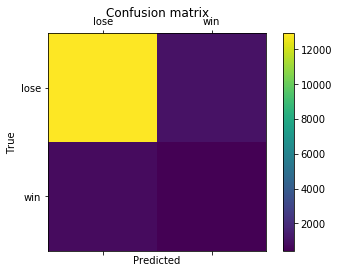

In [62]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

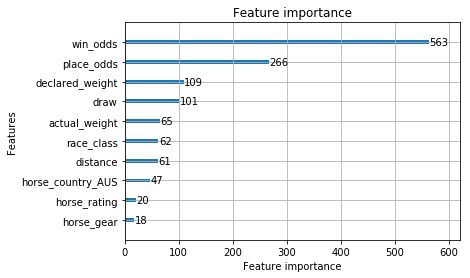

In [63]:
# plot model’s feature importances (Random Under-sampling)
lgb.plot_importance(clf_rus, max_num_features=10)

## LightGBM (over-sampling)

In [64]:
# convert array data into dataframe with column names, and feed into lgb model
X_sm = pd.DataFrame(X_sm, columns=list(X_train))
X_sm.head()

,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,surface,distance,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
0,3.0,60.0,0.0,989.0,133.0,13.0,4.7,2.1,0.0,1600.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,39.0,1.0,1134.0,132.0,2.0,16.0,5.2,0.0,1200.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,60.0,0.0,1064.0,131.0,7.0,8.8,2.7,0.0,1400.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,60.0,0.0,1052.0,132.0,8.0,7.5,2.4,0.0,1800.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,51.0,0.0,1066.0,119.0,10.0,57.0,12.0,0.0,1400.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
start = time()

d_train = lgb.Dataset(X_sm, label = y_sm)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100
clf_sm = lgb.train(params, d_train, 100)

end = time()
running_time = end - start
print('time cost: %.5f sec' %running_time)

time cost: 2.60979 sec


In [66]:
#Prediction
y_pred = clf_sm.predict(X_test)
#convert into binary values
for i in range(15140):
    if y_pred[i] >= 0.5:       # setting threshold 
        y_pred[i] = 1
    else:  
        y_pred[i] = 0

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.95     13918
         1.0       0.36      0.09      0.15      1222

    accuracy                           0.91     15140
   macro avg       0.64      0.54      0.55     15140
weighted avg       0.88      0.91      0.89     15140



[[13714   204]
 [ 1109   113]]


Text(0, 0.5, 'True')

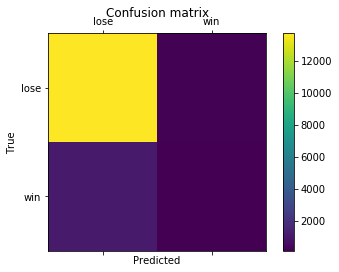

In [68]:
labels = ['lose', 'win']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

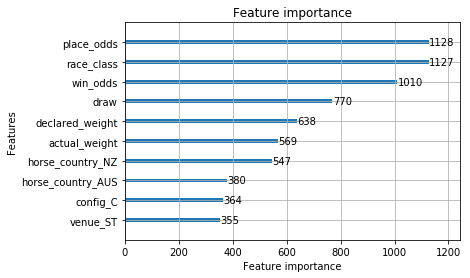

In [69]:
# plot model’s feature importances (SMOTE)
lgb.plot_importance(clf_sm, max_num_features=10)

* By processing a lot of data, kNN model trained with over-sampled data took the longest time, while LightGBM model trained with under-sampled data took the shortest time. 
* kNN models performed relatively worse with low precision score and f1-score of the positive class (1). 
* Training models aimed at minimize False Positive (predict: win, actual: lose), but it seems True Positive and False Positive are correlated. Same as gambling and investment, you have the chance to win and the risk to lose at the same time.
* File sizes of LightGBM models are incredibly small and the time spent on training models is really quick.

LightGBM code reference from Medium [article](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc) by Pushkar Mandot. Thank you for sharing your experience! =]

# DEPLOY MODELS

In [70]:
# data that never been seen by the models
last_race

,race_id,won,horse_age,horse_rating,horse_gear,declared_weight,actual_weight,draw,win_odds,place_odds,...,config_C+3,going_GOOD,going_GOOD TO FIRM,going_GOOD TO YIELDING,going_SLOW,going_SOFT,going_WET FAST,going_WET SLOW,going_YIELDING,going_YIELDING TO SOFT
76697,6128,0.0,6,80,1,1078.0,133,11,99.0,19.0,...,1,0,1,0,0,0,0,0,0,0
76698,6128,0.0,4,77,1,1110.0,130,8,13.0,2.9,...,1,0,1,0,0,0,0,0,0,0
76699,6128,0.0,4,74,0,980.0,127,5,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
76700,6128,1.0,3,73,1,1153.0,126,3,1.7,1.2,...,1,0,1,0,0,0,0,0,0,0
76701,6128,0.0,4,73,1,1117.0,124,2,71.0,11.0,...,1,0,1,0,0,0,0,0,0,0
76702,6128,0.0,3,70,1,1166.0,123,13,99.0,23.0,...,1,0,1,0,0,0,0,0,0,0
76703,6128,0.0,4,70,1,1116.0,123,12,17.0,3.0,...,1,0,1,0,0,0,0,0,0,0
76704,6128,0.0,4,68,1,1068.0,121,10,55.0,9.0,...,1,0,1,0,0,0,0,0,0,0
76705,6128,0.0,4,67,1,1091.0,118,1,7.9,2.0,...,1,0,1,0,0,0,0,0,0,0
76706,6128,0.0,4,65,0,1141.0,116,4,33.0,5.7,...,1,0,1,0,0,0,0,0,0,0


In [71]:
# drop unnecessary columns & define data and labels
X_deploy = last_race.drop(columns=['race_id', 'won'])
y_deploy = last_race.won

## Load kNN model trained with original data

In [72]:
predictions = knn.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        13
         1.0       0.00      0.00      0.00         1

    accuracy                           0.79        14
   macro avg       0.46      0.42      0.44        14
weighted avg       0.85      0.79      0.82        14



Only class 0 (lose) can be predicted. 

## Load kNN model trained with under-sampled data

In [73]:
predictions = knn_rus.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        13
         1.0       0.50      1.00      0.67         1

    accuracy                           0.93        14
   macro avg       0.75      0.96      0.81        14
weighted avg       0.96      0.93      0.94        14



kNN model trained with under-sampled data can predict the winning horse. However, there is also one False Positive in the prediction. 

Text(0, 0.5, 'Actual')

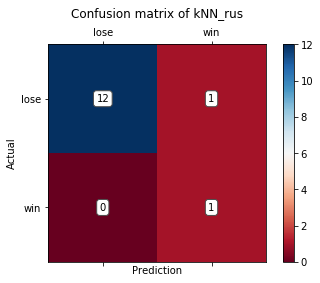

In [74]:
import numpy as np

data = confusion_matrix(y_deploy, predictions)

fig, ax = plt.subplots()
cax = ax.matshow(data, cmap='RdBu')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix of kNN_rus', y=1.1)
fig.colorbar(cax)
labels = ['lose', 'win']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Load kNN model trained with over-sampled data

In [75]:
predictions = knn_sm.predict(X_deploy)
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        13
         1.0       0.00      0.00      0.00         1

    accuracy                           0.86        14
   macro avg       0.46      0.46      0.46        14
weighted avg       0.86      0.86      0.86        14



Only class 0 (lose) can be predicted.

## Load LightGBM models & Set threshold values same as the training models

In [76]:
predictions = clf.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions[i] >= 0.0995:       # setting threshold 
        predictions[i] = 1
    else:  
        predictions[i] = 0

In [77]:
predictions_rus = clf_rus.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions_rus[i] >= 0.55:       # setting threshold 
        predictions_rus[i] = 1
    else:  
        predictions_rus[i] = 0

In [78]:
predictions_sm = clf_sm.predict(X_deploy)
#convert into binary values
for i in range(14):
    if predictions_sm[i] >= 0.5:       # setting threshold 
        predictions_sm[i] = 1
    else:  
        predictions_sm[i] = 0

## Predictions of the LightGBM models

In [79]:
print(classification_report(y_deploy, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [80]:
print(classification_report(y_deploy, predictions_rus))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [81]:
print(classification_report(y_deploy, predictions_sm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



All LightGBM models can achieve 100% accuracy rate. 

Text(0, 0.5, 'Actual')

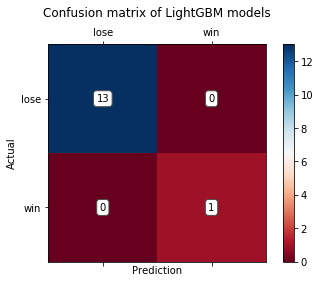

In [82]:
data = confusion_matrix(y_deploy, predictions)

fig, ax = plt.subplots()
cax = ax.matshow(data, cmap='RdBu')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix of LightGBM models', y=1.1)
fig.colorbar(cax)
labels = ['lose', 'win']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Prediction')
plt.ylabel('Actual')

## Conclusions:
For KNeighborsClassifier, only model trained with under-sampled data can predict both class 0 and class 1 (with one False Positive error). The original data model and over-sampling model can only predict class 0.  <br/>
LightGBM models can predict all data correctly, even using the model trained with skewed dataset (by tuning the threshold value). 

Confusion matrix plot code reference from [Stack Overflow](https://stackoverflow.com/questions/20998083/show-the-values-in-the-grid-using-matplotlib) user Joe Kington. Thank you for sharing your experience! =]